### Zadania

Lista składa się z dwóch sekcji: pierwsza (zadania 1 i 2) dotyczy metod detekcji krawędzi, druga (zadania 3 i 4) operacji na histogramach.

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

data_directory = '../Data'

##### Zad. 1: Wyznaczenie gradientów

Wykonaj dla obrazu `coins` sztuczny obraz ilustrujący wielkość (moduł) wektora gradientu w danym punkcie. Do wyświetlenia użyj [mapy kolorów](https://matplotlib.org/stable/tutorials/colors/colormaps.html) `hot` do oznaczenia wielkości gradientu odpowiednim kolorem – im większa wartość, tym bardziej czerwony (_mapa ciepła_).

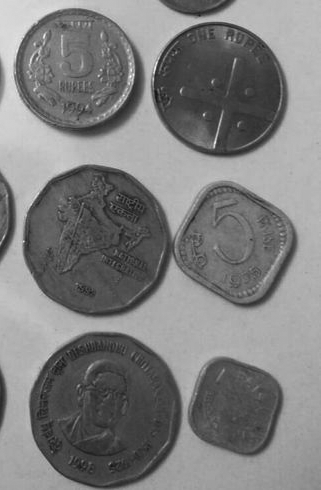

In [16]:
coins = cv2.imread(f'{data_directory}/Monety_szare.bmp', cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins)

Rozwiązanie:

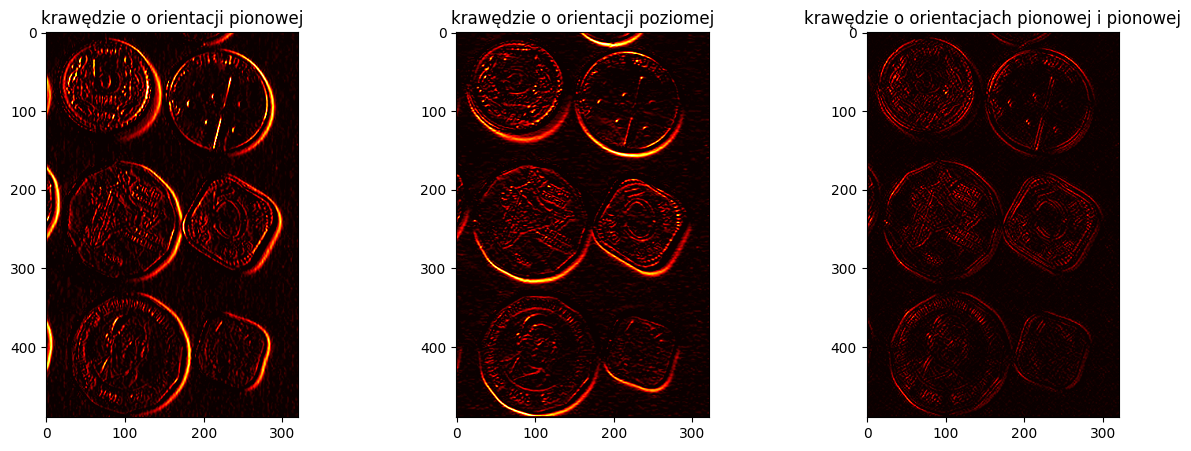

In [17]:
#Detekcja krawędzi metodą Sobela - w kierunku X:
sobelx = cv2.Sobel(src=coins, ddepth=cv2.CV_8U, dx=1, dy=0, ksize=3)

#Detekcja krawędzi metodą Sobela - w kierunku Y:
sobely = cv2.Sobel(src=coins, ddepth=cv2.CV_8U, dx=0, dy=1, ksize=3)

#Detekcja krawędzi metodą Sobela - w kierunkach X i Y:
sobelxy = cv2.Sobel(src=coins, ddepth=cv2.CV_8U, dx=1, dy=1, ksize=3)

f, (a1, a2, a3) = plt.subplots(1, 3)
f.set_figwidth(15)
f.set_figheight(5)
a1.imshow(sobelx, cmap='hot');
a1.set_title('krawędzie o orientacji pionowej');
a2.imshow(sobely, cmap='hot');
a2.set_title('krawędzie o orientacji poziomej');
a3.imshow(sobelxy, cmap='hot');
a3.set_title('krawędzie o orientacjach pionowej i pionowej');


---

##### Zad. 2: Detekcja krawędzi

Przeprowadź z obrazem `coins_noise` takie przekształcenia, aby zmaksymalizować możliwość rozpoznania obiektów poprzez detekcję krawędzi. Wykorzystaj filtr Canny'ego dla różnych wartości progów oraz filtry redukcji szumu.

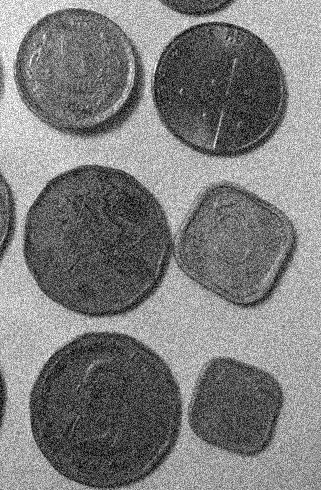

In [18]:
coins_noise = cv2.imread(f'{data_directory}/Monety_szare_szum.bmp', cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins_noise)

Rozwiązanie:

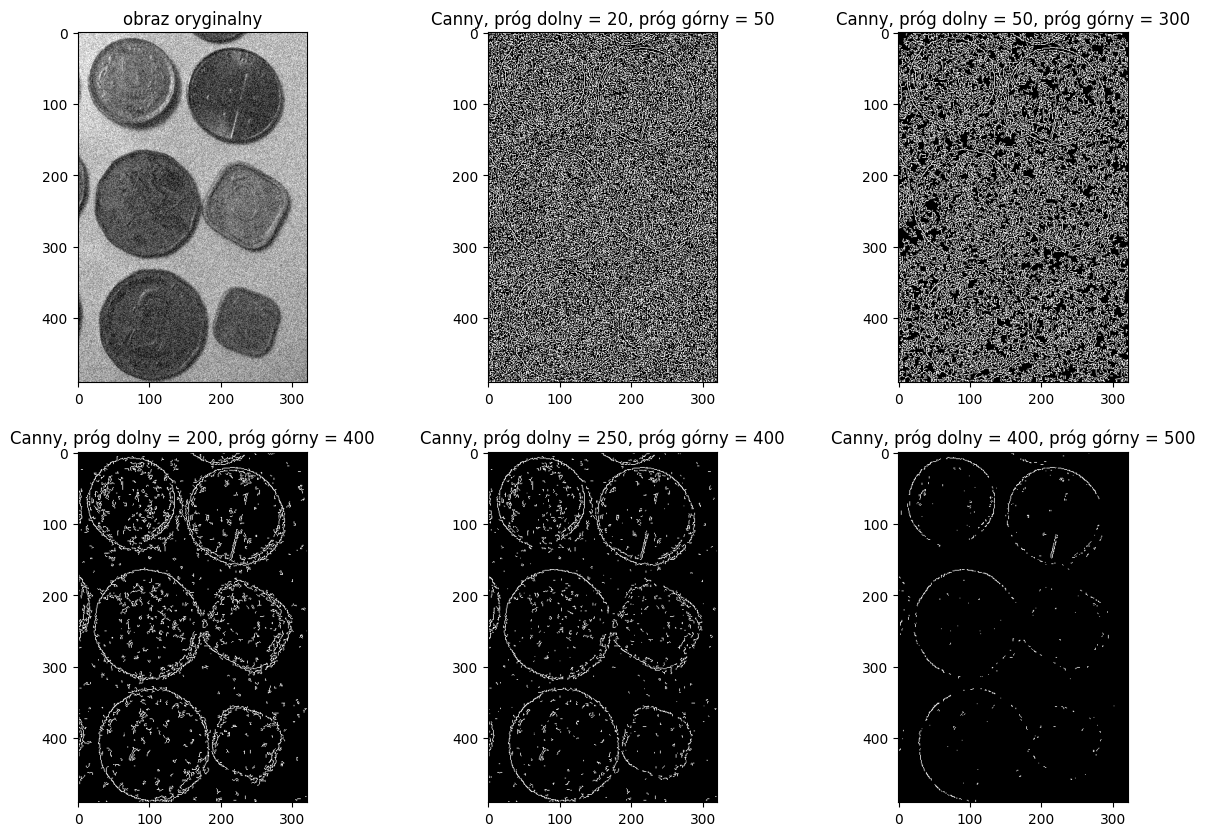

In [19]:
#Detekcja krawędzi metodą Canny'ego - wynik zależy od doboru wartości progów:
f, ((a1, a2, a3), (a4, a5, a6)) = plt.subplots(2, 3)
f.set_figwidth(15)
f.set_figheight(10)

a1.imshow(coins_noise, cmap='gray');
a1.set_title('obraz oryginalny')

for ax, t1, t2 in zip([a2, a3, a4, a5, a6], [20, 50, 200, 250, 400], [50, 300, 400, 400, 500]):
    ax.imshow(cv2.Canny(image=coins_noise, threshold1=t1, threshold2 = t2), cmap='gray');
    ax.set_title('Canny, próg dolny = {}, próg górny = {}'.format(t1, t2))

---

##### Zad. 3: Wyrównanie histogramu

Wyrównaj histogram obrazu `coins_noise`. Wyniki zaprezentuj za pomocą obrazów i towarzyszących im histogramów.

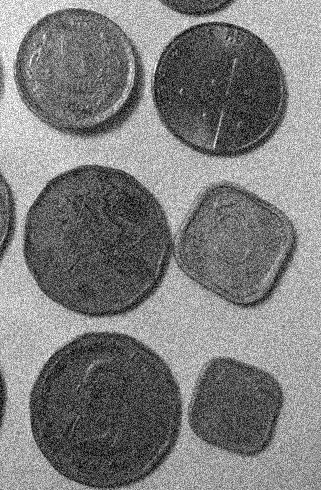

In [20]:
Image.fromarray(coins_noise)

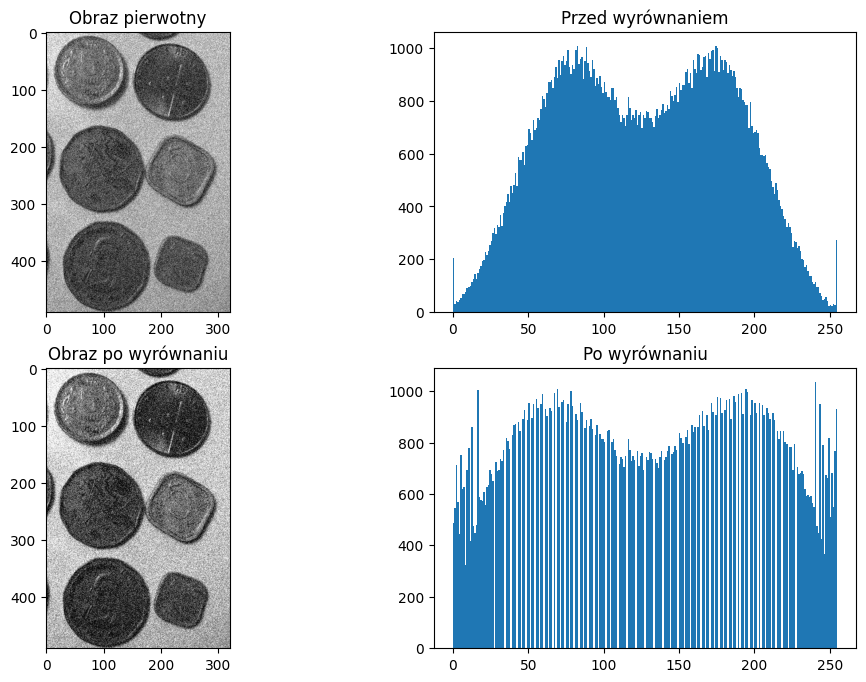

In [21]:
equ = cv2.equalizeHist(coins_noise)

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax[0][0].imshow(coins_noise, cmap='gray')
ax[0][0].set_title("Obraz pierwotny")
ax[0][1].hist(coins_noise.flatten(), bins=255)
ax[0][1].set_title("Przed wyrównaniem")
ax[1][0].imshow(equ, cmap='gray')
ax[1][0].set_title("Obraz po wyrównaniu")
ax[1][1].hist(equ.flatten(), bins=255)
ax[1][1].set_title("Po wyrównaniu")

plt.show()

---

##### Zad. 4: Transformacja do rozkładu docelowego

Dla obrazów `hare_gray` i `hare_color` wykonaj transformacje na składowych S i/lub V modelu HSV, przechodząc do wybranego (założonego) rozkładu docelowego, tak aby zmaksymalizować możliwość wyodrębnienia obiektu z otoczenia (zająca) przy użyciu algorytmu binaryzacji Otsu.

Podpowiedź: przedstawiona we wstępie teoretycznym transformacja obu rozkładów (źródłowego i docelowego) do rozkładu jednostajnego _nie musi_ zostać faktycznie wykonana (dlatego nie używaj w zadaniu funkcji `cv2.equalizeHist`)! Wystarczy porównywanie ze sobą wartości ze skumulowanych rozkładów (rysunek 3).

Podpowiedź 2: [cv2.LUT](https://docs.opencv.org/4.5.3/d2/de8/group__core__array.html#gab55b8d062b7f5587720ede032d34156f)

**4A** (`hare_gray`):

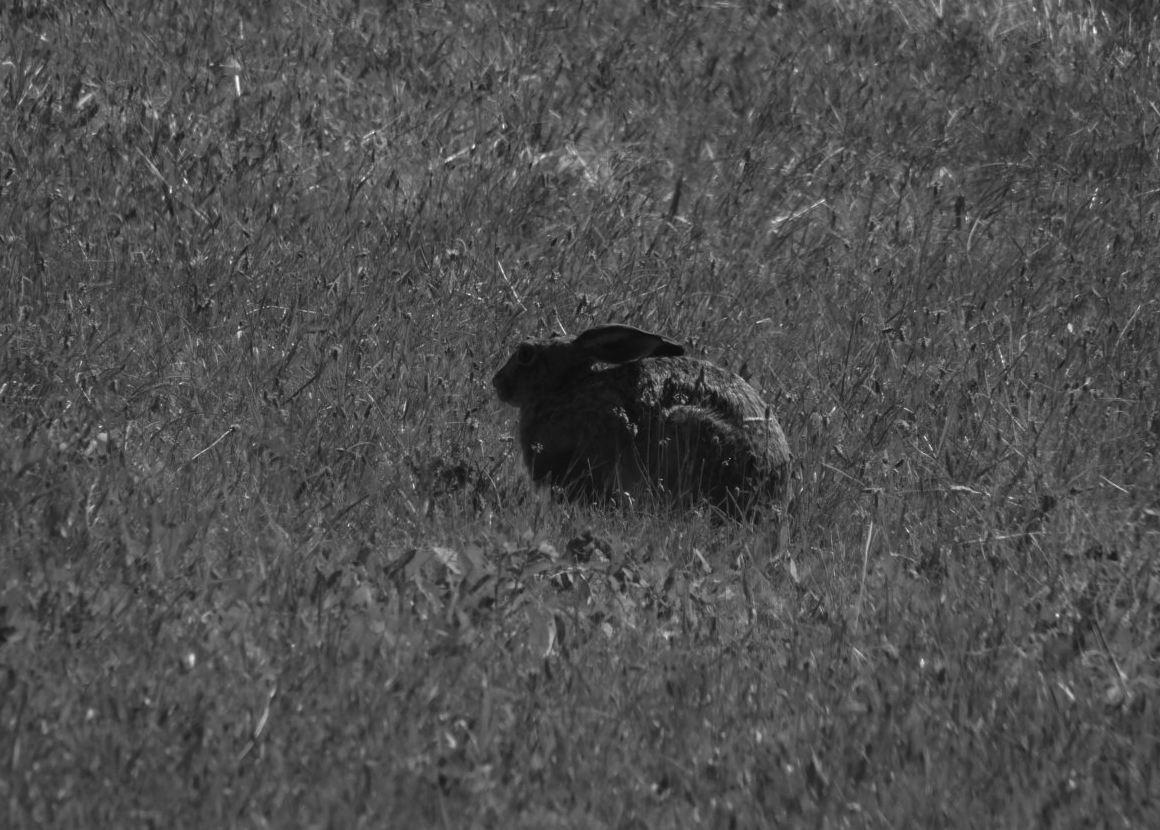

In [22]:
hare_gray = cv2.imread(f'{data_directory}/Zajac.jpg', cv2.IMREAD_GRAYSCALE)
Image.fromarray(hare_gray)

Rozwiązanie:

In [38]:
# Krok 2 - przekształcenie rozkładu żądanego dla obrazu do rozkładu jednostajnego

#Rozklad bimodalny
def get_bimodal_histogram():
    # ze wzoru po prostu mozna policzyc w 256 punktach 
    N1 = 1000
    N2 = 11000
    mu, sigma = 50, 15
    mu2, sigma2 = 200, 15
    X1 = np.random.normal(mu, sigma, N1)
    X2 = np.random.normal(mu2, sigma2, N2)
    X = np.concatenate([X1, X2])
    return np.histogram(X, 256)[0]

# Obliczenie dystrybuanty na podstawie histogramu
def get_distribution(histogram):
    histogram = histogram / histogram.sum()
    distribution = histogram.cumsum()
    return distribution 

def LUT(img, distribution, distribution_ref):
    lut_table = np.zeros(256)
    for i in range(len(lut_table)):
        lut_table[i] = np.argmin(np.abs(distribution_ref - distribution[i]))
    return cv2.LUT(img, lut_table)

# def match_histogram(img, img_histogram, target_histogram):
#     img_distribution = get_distribution(img_histogram)
#     target_distribution = get_distribution(target_histogram)

#     img_lut = LUT(img, img_distribution, target_distribution)
#     return img_lut

def transform_img_to_bimodal(img, target_histogram = None):
    img_histogram = np.histogram(img, 256)[0]
    if target_histogram is None:
        target_histogram = get_bimodal_histogram()

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle("Rozkład obrazka")
    ax[0].hist(img.flatten(), bins=255)
    ax[0].set_title("Obraz")
    ax[1].bar(np.arange(256), target_histogram)
    ax[1].set_title("Rozkład docelowy")
    fig.tight_layout()
    plt.show()

    img_distribution = get_distribution(img_histogram)
    target_distribution = get_distribution(target_histogram)


    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle("Dystrybuanty")
    ax[0].plot(img_distribution)
    ax[0].set_title("Obraz")
    ax[1].plot(target_distribution)
    ax[1].set_title("Rozkład docelowy")
    fig.tight_layout()

    plt.show()

    img_lut = LUT(img, img_distribution, target_distribution)

    (T, transformed) = cv2.threshold(img_lut.astype(np.uint8), 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    print('Próg: ', T)

    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    fig.suptitle("Efekt transformacji")
    axs[0].imshow(img, cmap="gray")
    axs[0].set_title("Obraz")
    axs[1].imshow(img_lut, cmap="gray")
    axs[1].set_title("Obraz po transformacji")
    axs[2].imshow(transformed, cmap="gray")
    axs[2].set_title("Obraz po progowaniu")
    fig.tight_layout()

    plt.show()

    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle("Histogramy koncowe")
    axs[0].hist(img_lut.flatten(), bins=255)
    axs[0].set_title("Histogram po transformacji")
    axs[1].hist(transformed.flatten(), bins=255)
    axs[1].set_title("Histogram po progowaniu")
    fig.tight_layout()
    img_lut_hist = plt
    plt.show()

    return img_lut

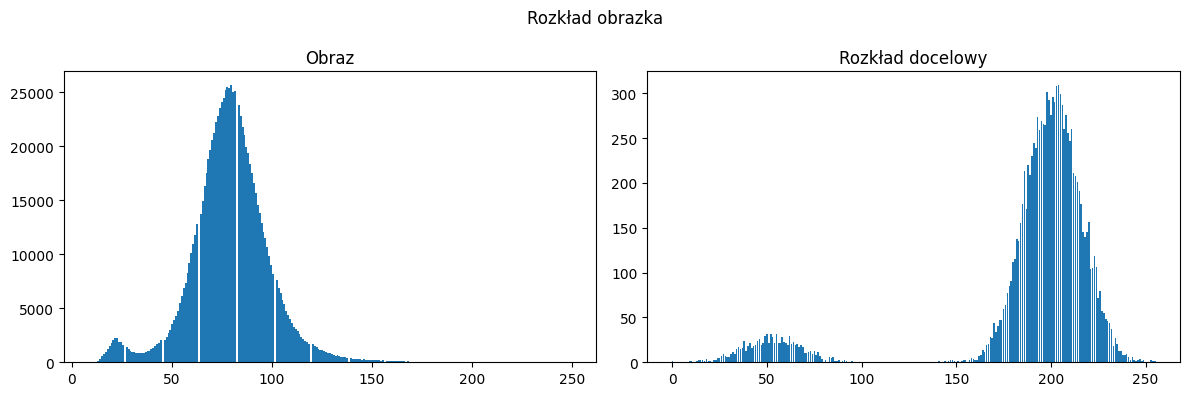

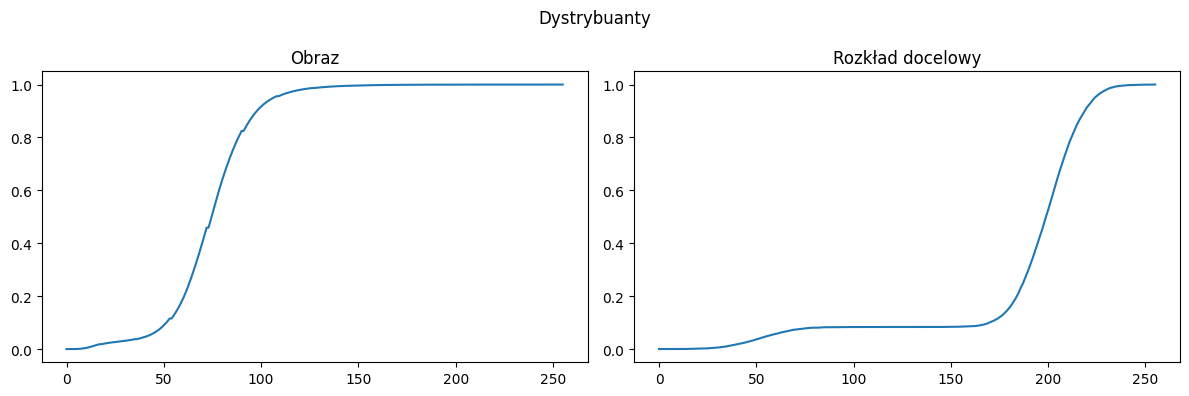

Próg:  88.0


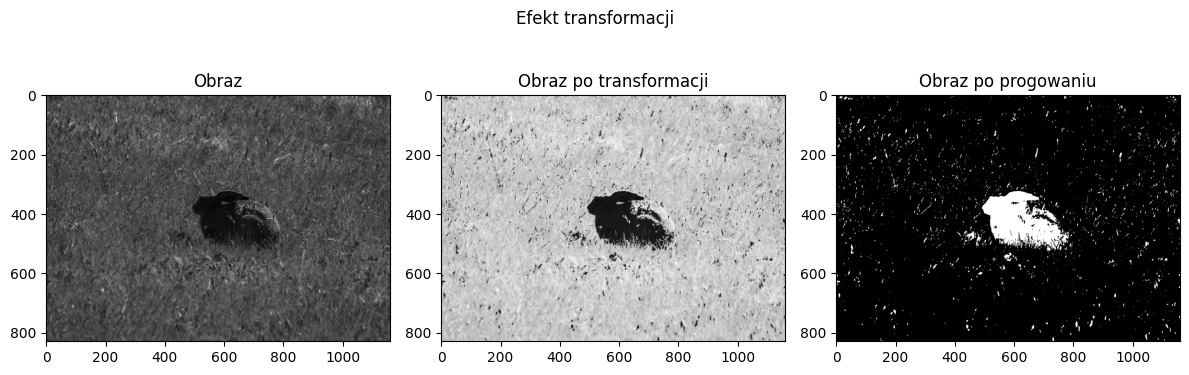

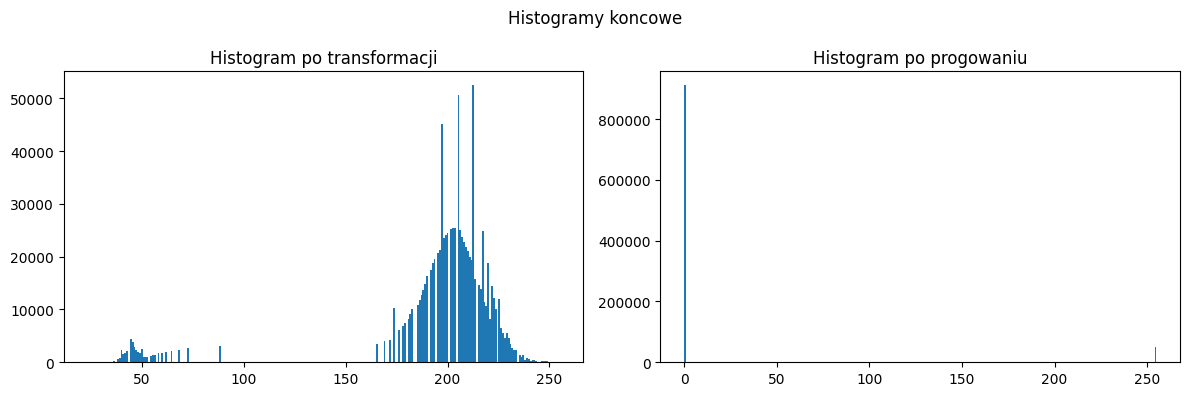

array([[194., 189., 190., ..., 217., 204., 172.],
       [194., 179., 190., ..., 213., 200.,  64.],
       [185., 178., 185., ..., 209., 193., 174.],
       ...,
       [190., 189., 189., ..., 195., 196., 196.],
       [190., 190., 189., ..., 195., 195., 196.],
       [192., 190., 192., ..., 195., 194., 194.]])

In [39]:
transform_img_to_bimodal(hare_gray)

---

**4B** (`hare_color`):

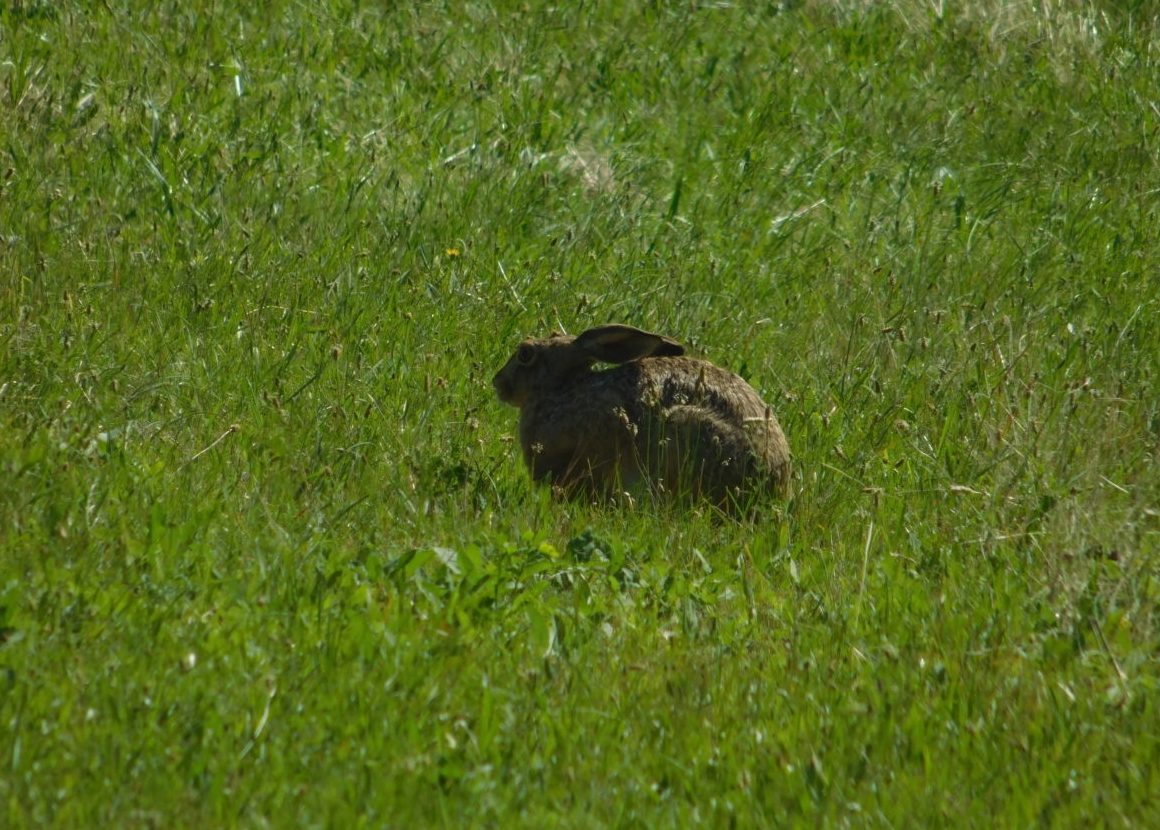

In [40]:
hare_color = cv2.imread(f'{data_directory}/Zajac_kolor.jpg')
Image.fromarray(hare_color[..., ::-1])

Rozwiązanie:

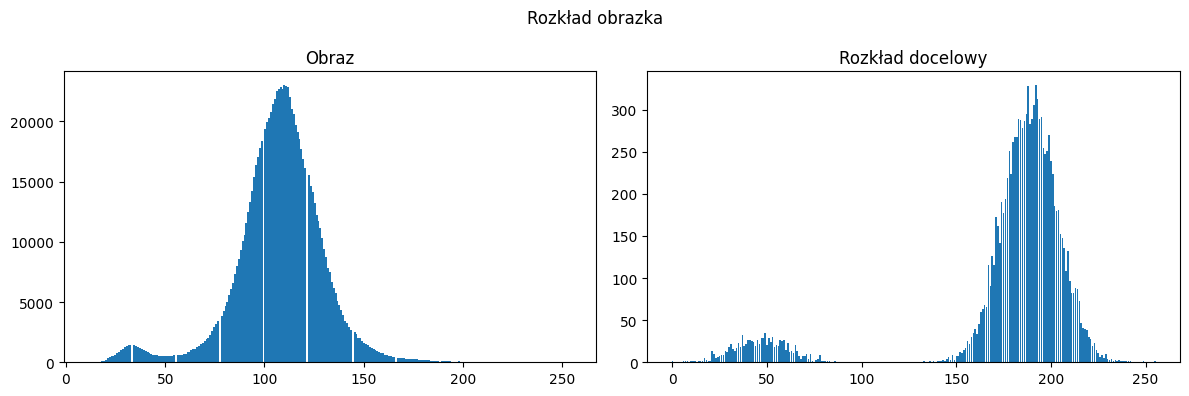

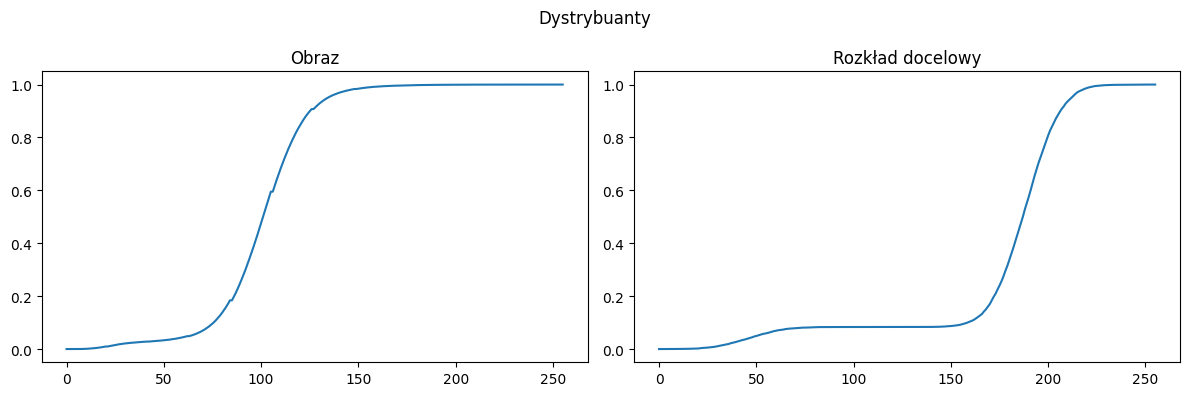

Próg:  70.0


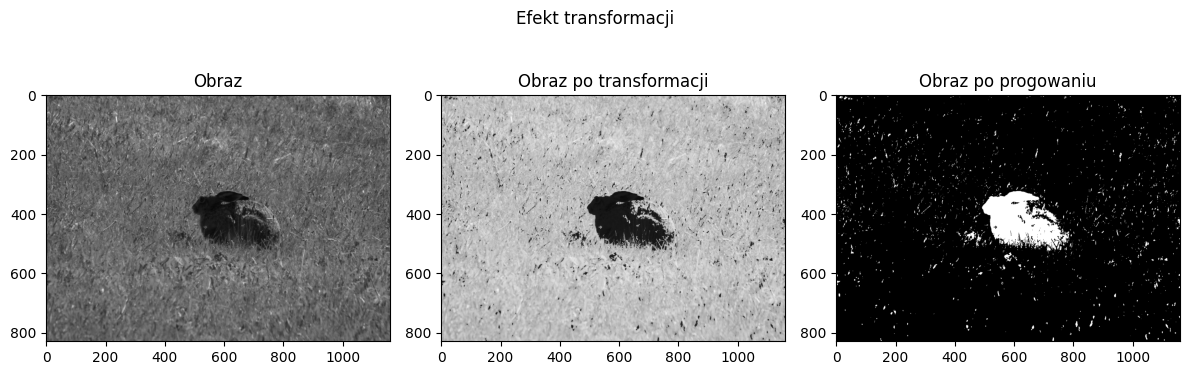

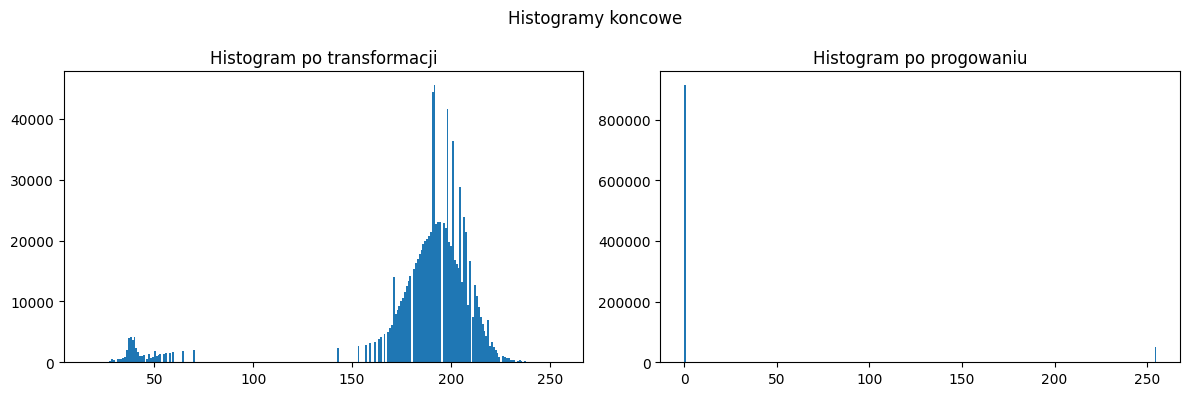

array([[183., 178., 180., ..., 204., 192., 162.],
       [185., 171., 180., ..., 201., 190.,  58.],
       [175., 171., 177., ..., 196., 182., 164.],
       ...,
       [181., 178., 178., ..., 183., 184., 184.],
       [179., 179., 179., ..., 182., 183., 185.],
       [181., 179., 180., ..., 183., 183., 184.]])

In [41]:
hare_color = cv2.imread(f'{data_directory}/Zajac_kolor.jpg')
Image.fromarray(hare_color[..., ::-1])
hsv = cv2.cvtColor(hare_color,  cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hare_color)
transform_img_to_bimodal(s)

# to moze byc blad w stylu uzywania zmiennej globalnej 

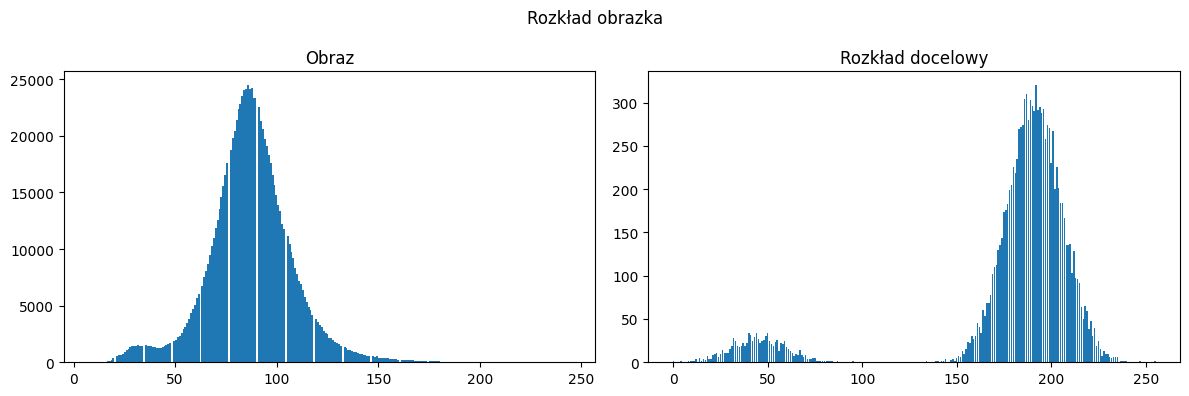

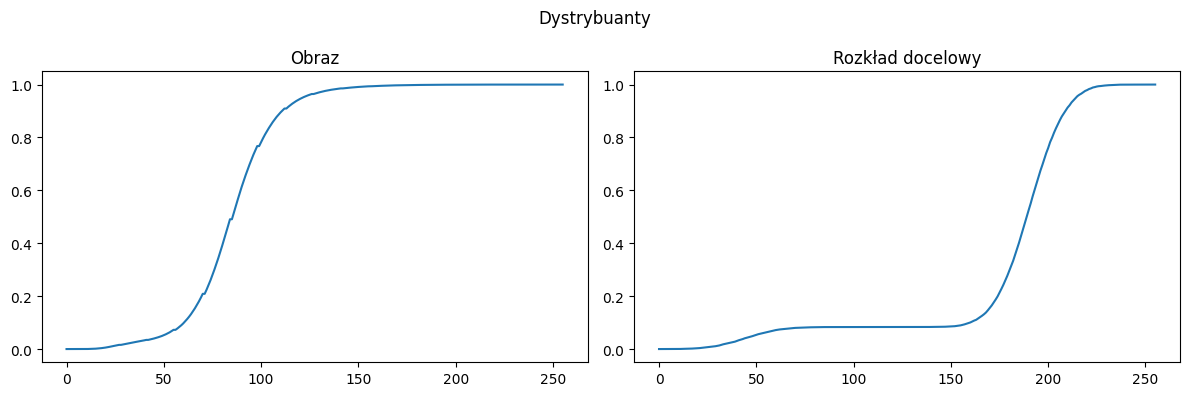

Próg:  67.0


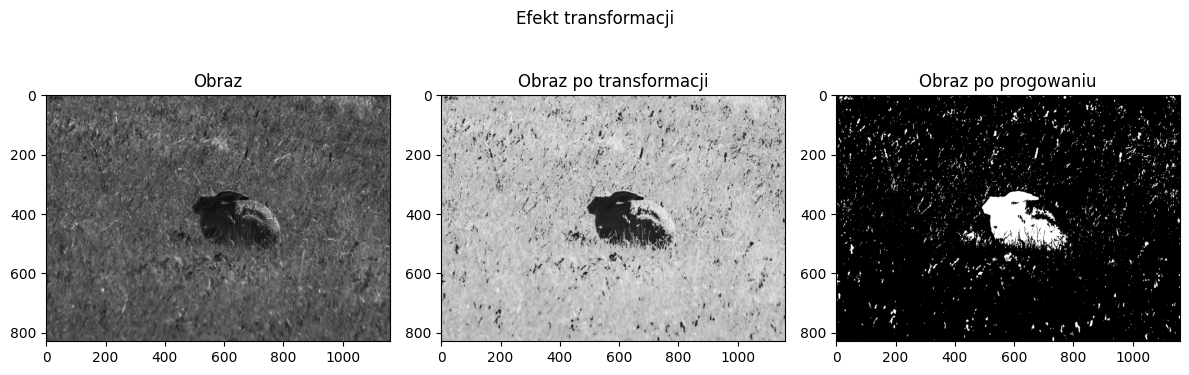

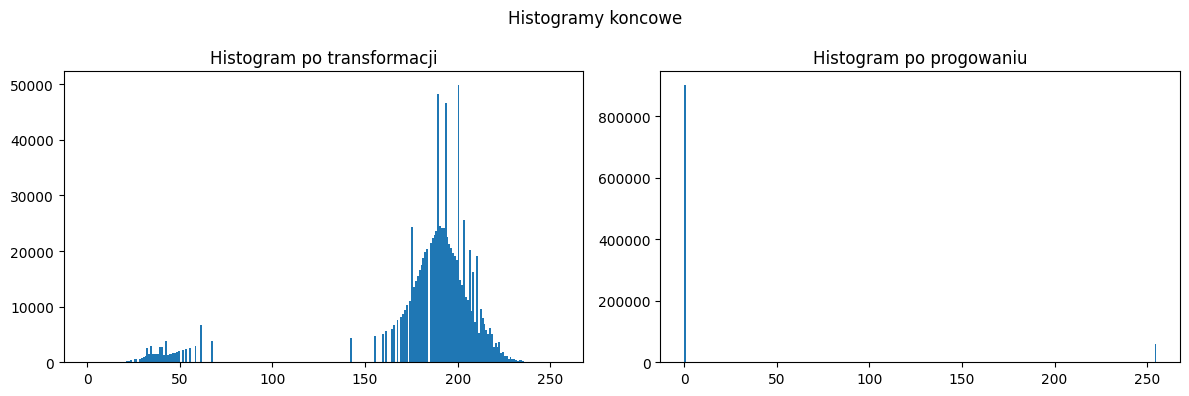

array([[181., 175., 176., ..., 208., 193.,  67.],
       [178., 161., 176., ..., 207., 193.,  51.],
       [164.,  58.,  67., ..., 202., 187., 164.],
       ...,
       [180., 178., 176., ..., 189., 188., 186.],
       [180., 179., 179., ..., 188., 187., 186.],
       [182., 180., 180., ..., 187., 187., 185.]])

In [42]:
hare_color = cv2.imread(f'{data_directory}/Zajac_kolor.jpg')
Image.fromarray(hare_color[..., ::-1])
hsv = cv2.cvtColor(hare_color,  cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hare_color)
transform_img_to_bimodal(v)